In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%pylab
%matplotlib inline

import scipy.linalg
import sklearn.decomposition as dec
import sklearn.datasets as ds
import seaborn as sns
import statsmodels.api as sm
import sklearn.preprocessing as skp
sns.set_context("talk")

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
#reading the csv
dataset = pd.read_csv("2022_LoL_esports_match_data_from_OraclesElixir_20221104.csv", low_memory = False)

#masking the dataset to show only complete data as well as only team data
newdataset = dataset[dataset["datacompleteness"] == "complete"]
teamdataset = newdataset[newdataset["position"] == 'team']

#dropping unnecessary classification columns like gameid and url
cleaneddataset = teamdataset.drop(["url", 'split', 'patch','playoffs', 'game','playerid', 'teamid', 'ban1','ban2','ban3','ban4','ban5','date','playername'], axis = 1)


In [4]:
#generating a correlation matrix of the cleaned dataset
cor = cleaneddataset.corr(numeric_only=True) 

#grabbing the result correlation column from the matrix
results = cor.result.to_dict() 

#removing the NaN values from the result correlation column
clean_results = {k: results[k] for k in results if not isnan(results[k])} 

#turning the cleaned results into a sorted dictionary (sorted by values)
sorteddict = sorted(clean_results.items(), key=lambda x:x[1])

#turning the sorted results into a list
sorted_results = list(sorteddict)

In [4]:
sorted_results[-21:]

[('firstmidtower', 0.45369114725604737),
 ('monsterkillsenemyjungle', 0.4808789155780898),
 ('xpdiffat15', 0.4925078606183914),
 ('golddiffat15', 0.5380993707971289),
 ('firsttothreetowers', 0.5560290182085744),
 ('dragons (type unknown)', 0.5744357905863939),
 ('elementaldrakes', 0.5752041893278148),
 ('dragons', 0.5773125151934989),
 ('earnedgold', 0.5786433389493582),
 ('doublekills', 0.5904066574076894),
 ('barons', 0.6247671822214014),
 ('firstbaron', 0.6642252960875722),
 ('team kpm', 0.6722428748237427),
 ('kills', 0.6753764793854251),
 ('teamkills', 0.6753764793854251),
 ('assists', 0.6776797718312247),
 ('inhibitors', 0.7453084575918484),
 ('gspd', 0.746949785869811),
 ('earned gpm', 0.8247888228590404),
 ('towers', 0.882544141539808),
 ('result', 1.0)]

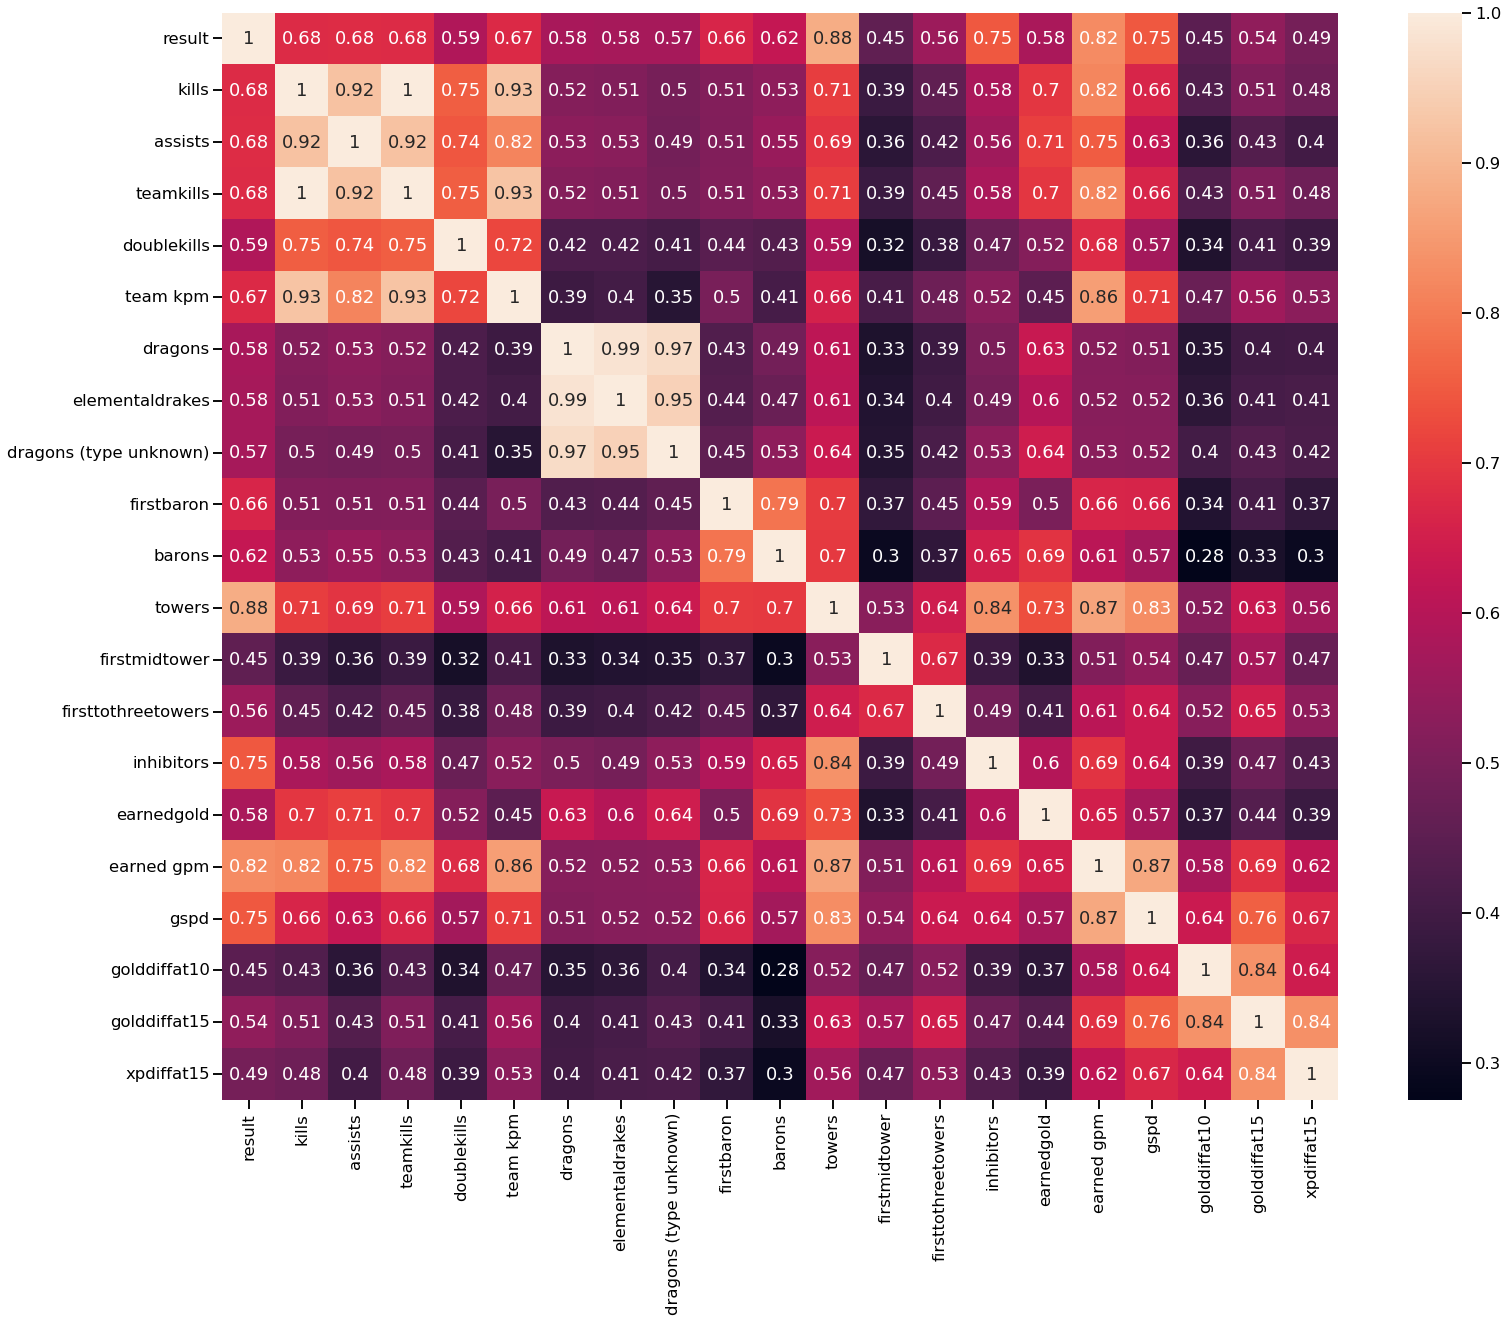

In [5]:
#Dropping the columns outside of the 20 highest correlated features
#Also dropped high correlation columns that had NaN values 
#product is the final dataset
final_dataset = cleaneddataset.drop(['firstbloodkill','firstbloodassist','firstbloodvictim','monsterkillsenemyjungle','damageshare','earnedgoldshare','champion','opp_towers', 'opp_inhibitors', 'deaths', 'teamdeaths', 'opp_barons', 'opp_dragons', 'opp_elementaldrakes', 'opp_goldat15', 'opp_xpat15', 'opp_goldat10', 'opp_turretplates', 'opp_killsat15', 'deathsat15', 'opp_heralds', 'opp_assistsat15', 'opp_xpat10', 'damagetakenperminute', 'opp_csat15', 'opp_killsat10', 'deathsat10', 'opp_assistsat10', 'opp_csat10', 'opp_elders', 'monsterkillsownjungle', 'participantid', 'year', 'ckpm', 'gamelength', 'controlwardsbought', 'chemtechs', 'damagemitigatedperminute', 'wardsplaced', 'minionkills', 'pentakills', 'wpm', 'wardskilled', 'elders', 'firstdragon', 'firstherald', 'csat10', 'quadrakills', 'wcpm', 'assistsat10', 'visionscore', 'clouds', 'mountains', 'oceans', 'opp_deathsat10', 'killsat10', 'firstblood', 'infernals', 'hextechs', 'csat15', 'xpat10', 'goldspent', 'assistsat15', 'heralds', 'opp_deathsat15', 'killsat15', 'damagetochampions', 'turretplates', 'csdiffat10', 'cspm', 'goldat10', 'monsterkills', 'xpat15', 'firsttower', 'vspm', 'triplekills', 'xpdiffat10', 'csdiffat15', 'dpm', 'totalgold', 'goldat15','total cs', 'datacompleteness'],axis = 1)

plt.figure(figsize = (25,20))
corr_matrix = final_dataset.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [6]:
final_dataset.head(8)

,gameid,league,side,position,teamname,result,kills,assists,teamkills,doublekills,...,towers,firstmidtower,firsttothreetowers,inhibitors,earnedgold,earned gpm,gspd,golddiffat10,golddiffat15,xpdiffat15
10,ESPORTSTMNT01_2690210,LCK CL,Blue,team,Fredit BRION Challengers,0,9,19,9,0.0,...,3.0,1.0,1.0,0.0,28222.0,988.5114,-0.028312,1523.0,107.0,-1617.0
11,ESPORTSTMNT01_2690210,LCK CL,Red,team,Nongshim RedForce Challengers,1,19,62,19,6.0,...,6.0,0.0,0.0,1.0,33769.0,1182.8021,0.028312,-1523.0,-107.0,1617.0
22,ESPORTSTMNT01_2690219,LCK CL,Blue,team,T1 Challengers,0,3,7,3,0.0,...,3.0,0.0,0.0,0.0,34688.0,984.5222,-0.207137,-1619.0,-1763.0,-906.0
23,ESPORTSTMNT01_2690219,LCK CL,Red,team,Liiv SANDBOX Challengers,1,16,39,16,1.0,...,11.0,1.0,1.0,2.0,48063.0,1364.1343,0.207137,1619.0,1763.0,906.0
46,ESPORTSTMNT01_2690227,LCK CL,Blue,team,KT Rolster Challengers,1,14,42,14,3.0,...,11.0,1.0,1.0,2.0,41372.0,1258.7830,0.165672,-103.0,1191.0,2298.0
47,ESPORTSTMNT01_2690227,LCK CL,Red,team,Gen.G Challengers,0,5,11,5,0.0,...,2.0,0.0,0.0,0.0,30681.0,933.4990,-0.165672,103.0,-1191.0,-2298.0
70,ESPORTSTMNT01_2690255,LCK CL,Blue,team,DWG KIA Challengers,0,16,41,16,3.0,...,5.0,1.0,1.0,0.0,43137.0,1040.2814,-0.064227,337.0,550.0,-1259.0
71,ESPORTSTMNT01_2690255,LCK CL,Red,team,DRX Challengers,1,13,26,13,1.0,...,9.0,0.0,0.0,1.0,51941.0,1252.5965,0.064227,-337.0,-550.0,1259.0


In [10]:
## Get all unique team names into a list
teams = []
for team in final_dataset['teamname']:
    if team not in teams:
        teams.append(team)
        
        

In [11]:
import time
start = time.time()

## For each team we want to find their win/loss ratio
## Add up the totals and add the ratio to a record list
record = []
for i in range(len(teams)):
    wins = 0
    loss = 0
    for j in final_dataset.index:
        if teams[i] == final_dataset['teamname'][j]:
            if final_dataset['result'][j] == 1:
                wins += 1
            else:
                loss += 1
    if loss == 0:
        record.append(1)
    else:
        div = round(wins/loss,2)
        record.append(div)


end = time.time()
print("Runtime: ",end-start)

Runtime:  158.7304482460022


In [12]:
## Getting team rankings using values from all of the feature columns after result
## Have not scaled the data by strength of win
cols = final_dataset.columns
scores = []
for i in range(len(teams)):
    rating = 0
    matches = 1
    for j in final_dataset.index:
        if teams[i] == final_dataset['teamname'][j]:
            matches += 1
            for col in cols[6:]:
                if not isnan(final_dataset[col][j]):
                    rating += (final_dataset[col][j])

    scores.append(rating/matches)


In [13]:
## Printing each teams rating on a new line in order from best to worst
## Trying to sort the teams by rating from best to worst
ratings = []
for z in range(len(scores)):
    if not isnan(scores[z]):
        ratings.append(scores[z])

unsorted_dict = {}
for a in range(len(ratings)):
    unsorted_dict[ratings[a]] = teams[a]
#rating_dict = sorted(rating_dict, reverse=True)
rating_dict = {}
for key in sorted(unsorted_dict.keys(),reverse=True):
    rating_dict[key] = unsorted_dict[key]
        
for k1,v1 in rating_dict.items():
    if k1 != 0.00:
        print(f'Team: {v1} || Rating: {k1:.2f}')

Team: Bethany Lutheran College || Rating: 46690.73
Team: Furious Gaming || Rating: 46219.41
Team: Royal Never Give Up || Rating: 44470.77
Team: AGO ROGUE || Rating: 44094.29
Team: Descuydado Esports || Rating: 43890.20
Team: Karmine Corp || Rating: 43724.86
Team: JD|XL || Rating: 43706.37
Team: Chiefs Esports Club || Rating: 43487.74
Team: Zeu5 Bogota || Rating: 43485.92
Team: T1 || Rating: 43402.61
Team: T1 Academy || Rating: 43369.03
Team: Saint Louis University || Rating: 43318.15
Team: The Kings || Rating: 43256.37
Team: Vitality.Bee || Rating: 43186.65
Team: Pampas || Rating: 43153.32
Team: Team Liquid Academy || Rating: 42966.86
Team: Leviatan Esports || Rating: 42787.12
Team: NASR eSports Turkey || Rating: 42752.10
Team: DetonatioN FocusMe || Rating: 42686.05
Team: QLASH Spain || Rating: 42631.26
Team: Gen.G || Rating: 42549.26
Team: 100 Thieves Next || Rating: 42496.73
Team: Galatasaray Esports || Rating: 42434.73
Team: LDLC OL || Rating: 42294.46
Team: paiN Gaming Academy || R

In [14]:
## Make a dictionary of the teams and their corresponding record
record_dict = {}
for i in range(len(teams)):
    record_dict[teams[i]] = record[i]

for k,v in record_dict.items():
    print(f'Team: {k} || Record: {v}')

Team: Fredit BRION Challengers || Record: 0.5
Team: Nongshim RedForce Challengers || Record: 1.02
Team: T1 Challengers || Record: 1.71
Team: Liiv SANDBOX Challengers || Record: 0.76
Team: KT Rolster Challengers || Record: 1.21
Team: Gen.G Challengers || Record: 1.11
Team: DWG KIA Challengers || Record: 1.44
Team: DRX Challengers || Record: 1.66
Team: Kwangdong Freecs Challengers || Record: 0.79
Team: Hanwha Life Esports Challengers || Record: 0.4
Team: Vanir || Record: 0.59
Team: Team Singularity || Record: 0.19
Team: Movistar Riders || Record: 0.6
Team: Team Heretics || Record: 1.62
Team: BISONS ECLUB || Record: 1.09
Team: G2 Arctic || Record: 0.96
Team: Bifrost || Record: 1.88
Team: MNM Gaming || Record: 0.54
Team: NYYRIKKI || Record: 0.74
Team: Astralis Talent || Record: 1.12
Team: Fnatic TQ || Record: 1.89
Team: MAD Lions Madrid || Record: 0.34
Team: Riddle Esports || Record: 1.5
Team: X7 Esports || Record: 2.0
Team: Barça eSports || Record: 1.24
Team: KOI || Record: 1.0
Team: Dust

Team: GTZ Esports || Record: 1
Team: ZeroZone Gaming || Record: 0.0


In [15]:
## Multiple regression for the variable `towers`
## Towers are what you need to win the game, we need to find what leads to a team destorying the other teams tower
df = final_dataset
df = df.dropna()
cols = df.columns
## Drop the columns that have significance levels greater than alpha = 0.05
new_x1 = df[cols].drop(columns=['result','gameid','league','side','position','teamname',
                                'towers','barons','golddiffat10','golddiffat15','xpdiffat15',
                               'kills','teamkills','doublekills','team kpm','firstmidtower'])
x_c = sm.add_constant(new_x1)
new_model1 = sm.OLS(df['towers'],x_c)
results = new_model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 towers   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     686.3
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:09:41   Log-Likelihood:                -976.97
No. Observations:                 654   AIC:                             1976.
Df Residuals:                     643   BIC:                             2025.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5.2403      0.579     -9.043      0.000      -6.378      -4.102
assists                   -0.0100      0.004     -2.372      0.018      -0.018      -0.002
dragons                   -1.0998      0.202     -5.435      0.000      -1.497      -0.702
elementaldrakes            0.7041      0.167      4.222      0.000       0.377       1.031
dragons (type unknown)     0.5644      0.131      4.323      0.000       0.308       0.821
firstbaron                 0.5889      0.123      4.803      0.000       0.348       0.830
firsttothreetowers         0.6404      0.114      5.614      0.000       0.416       0.864
inhibitors                 1.1307      0.058     19.583      0.000       1.017       1.244
earnedgold              7.421e-05      8e-06      9.279      0.000    5.85e-05    8.99e-05
earned gpm                 0.0060      0.001     11.296      0.000       0.005       0.007
gspd                       2.9854      0.612      4.881      0.000       1.784       4.186
==============================================================================
Omnibus:                        2.492   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.288   Jarque-Bera (JB):                2.567
Skew:                          -0.136   Prob(JB):                        0.277
Kurtosis:                       2.858   Cond. No.                     6.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


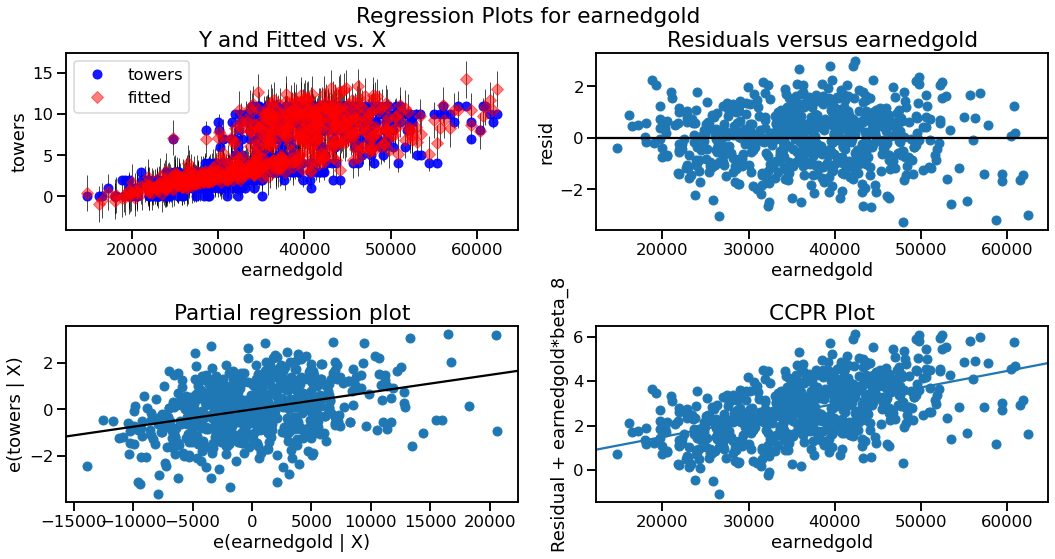

In [19]:
## Plot the results of the regression model against the variable with the lowest standard error (earned gold)
fig = plt.figure(figsize=[15,8])
fig = sm.graphics.plot_regress_exog(results, exog_idx = 'earnedgold', fig=fig)